In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sn

In [6]:
fruits = pd.read_csv('/Users/DRepani/Documents/Datasets/fruits.csv')
fruits.head()


,color,sphericity,weight,label
0,Orange,0.947,120,Orange
1,Orange,0.917,125,Orange
2,Orange,0.923,110,Orange
3,Orange,0.916,123,Orange
4,Orange,0.943,124,Orange


In [7]:
fruits.tail()

,color,sphericity,weight,label
55,Reddish yellow,0.745,172,Apple
56,Reddish yellow,0.753,143,Apple
57,Reddish yellow,0.753,177,Apple
58,Red,0.839,162,Apple
59,Reddish yellow,0.751,140,Apple


In [8]:
fruits.label.value_counts() # with this confirmed that label is our target variable to findout the fruit whether 
#its orange or apple. this are called balanced dataset.


label
Orange    30
Apple     30
Name: count, dtype: int64

In [9]:
fruits.color.value_counts()

color
Green              20
Orange             10
Greenish yellow    10
Reddish yellow     10
Red                10
Name: count, dtype: int64

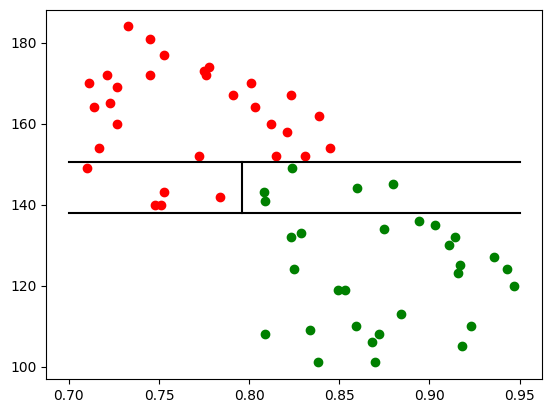

In [27]:
plt.scatter(x="sphericity", y="weight", data=fruits[fruits.label=='Apple'], c='red')
plt.scatter(x="sphericity", y="weight", data=fruits[fruits.label=='Orange'], c='green')
plt.plot([0.70, 0.95], [138, 138], c='black')
plt.plot([0.70, 0.95], [150.5, 150.5], c='black')
plt.plot([0.796, 0.796],[138, 150.5], c='black')

plt.show()

In [10]:
X= fruits[['sphericity', 'weight']]
y = fruits['label']

In [11]:
X.shape, y.shape

((60, 2), (60,))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((45, 2), (15, 2), (45,), (15,))

-- Training the model as mentioned below code:

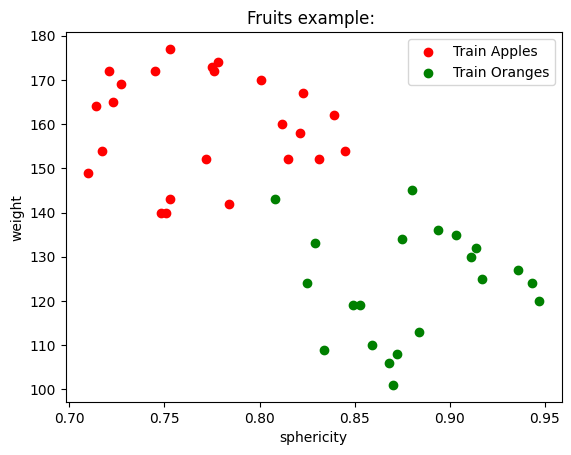

In [14]:
plt.scatter(x='sphericity', y='weight', data=X_train[y_train=='Apple'], c='red', label='Train Apples')
plt.scatter(x='sphericity', y='weight', data=X_train[y_train=='Orange'], c='green', label='Train Oranges')
plt.xlabel('sphericity')
plt.ylabel('weight')
plt.title('Fruits example: ')
plt.legend()
plt.show()

-- Testing the model 

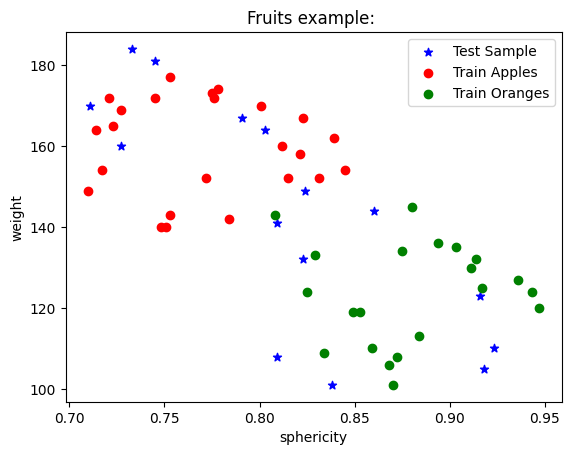

In [15]:
plt.scatter(x='sphericity', y='weight', data=X_test, c='blue', marker='*', label = 'Test Sample')
plt.scatter(x='sphericity', y='weight', data=X_train[y_train=='Apple'], c='red', label='Train Apples')
plt.scatter(x='sphericity', y='weight', data=X_train[y_train=='Orange'], c='green', label='Train Oranges')
plt.xlabel('sphericity')
plt.ylabel('weight')
plt.title('Fruits example: ')
plt.legend()
plt.show()

In [16]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [33]:
model = DecisionTreeClassifier(criterion='entropy', splitter="best", max_depth=3)

In [44]:
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

- Plotting decisiontree model 

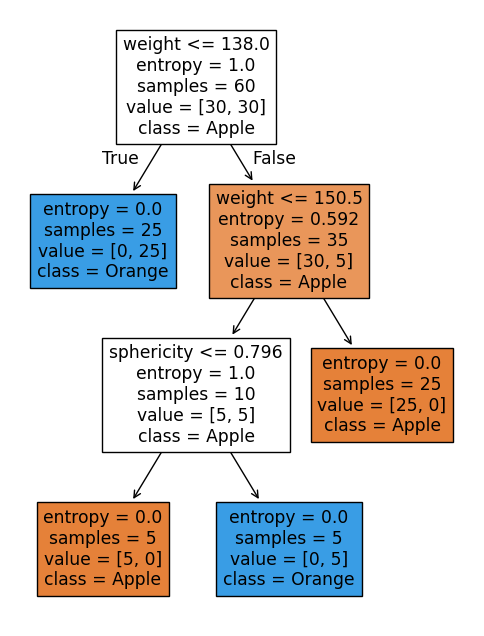

In [50]:
plt.figure(figsize=[6,8])

plot_tree(model, feature_names=['sphericity', 'weight'], class_names=['Apple', 'Orange'], filled=True)
plt.show()

- Using export_text

In [40]:
from sklearn.tree import DecisionTreeClassifier,plot_tree, export_text

In [49]:
r = export_text(model, feature_names=['sphericity', 'weight'], class_names=['Apple', 'Orange'], decimals=3, show_weights=True)
print(r)

|--- weight <= 138.000
|   |--- weights: [0.000, 25.000] class: Orange
|--- weight >  138.000
|   |--- weight <= 150.500
|   |   |--- sphericity <= 0.796
|   |   |   |--- weights: [5.000, 0.000] class: Apple
|   |   |--- sphericity >  0.796
|   |   |   |--- weights: [0.000, 5.000] class: Orange
|   |--- weight >  150.500
|   |   |--- weights: [25.000, 0.000] class: Apple



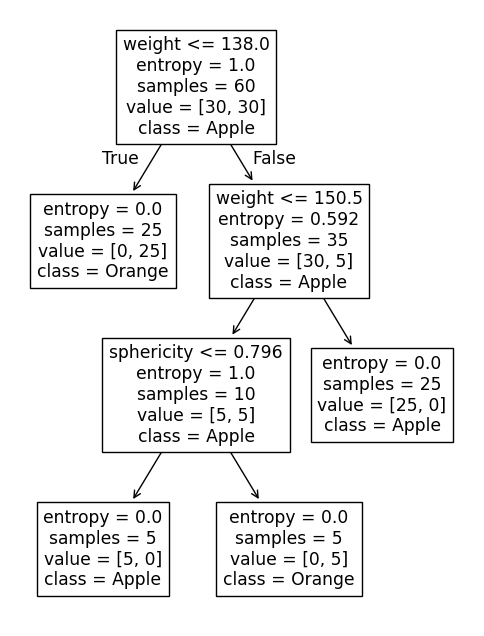

In [53]:
plt.figure(figsize=[6,8])

plot_tree(model, feature_names=X.columns, class_names=model.classes_)
plt.show()

## Using GINI index parameter in DecisionTreeClassifier:

In [54]:
model = DecisionTreeClassifier()

In [55]:
model.fit(X, y)

DecisionTreeClassifier()

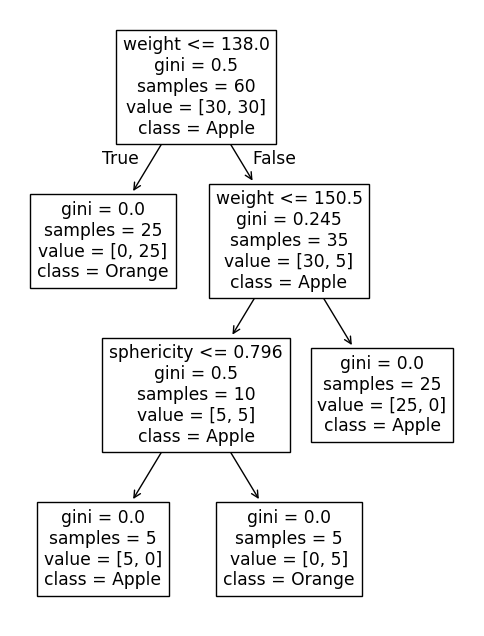

In [56]:
plt.figure(figsize=[6,8])

plot_tree(model, feature_names=X.columns, class_names=model.classes_)
plt.show()

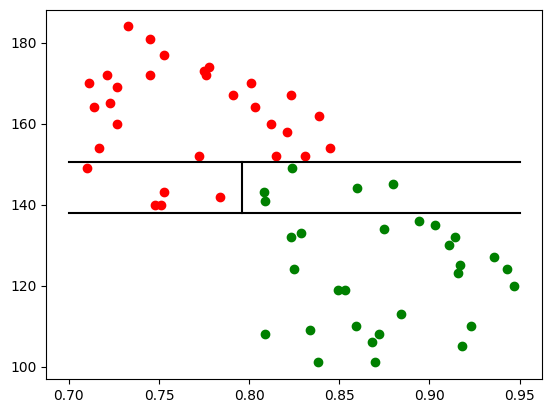

In [58]:
plt.scatter(x="sphericity", y="weight", data=fruits[fruits.label=='Apple'], c='red')
plt.scatter(x="sphericity", y="weight", data=fruits[fruits.label=='Orange'], c='green')
plt.plot([0.70, 0.95], [138, 138], c='black')
plt.plot([0.70, 0.95], [150.5, 150.5], c='black')
plt.plot([0.796, 0.796],[138, 150.5], c='black')

plt.show()

In [57]:
r = export_text(model, feature_names=['sphericity', 'weight'], class_names=['Apple', 'Orange'], decimals=3, show_weights=True)
print(r)

|--- weight <= 138.000
|   |--- weights: [0.000, 25.000] class: Orange
|--- weight >  138.000
|   |--- weight <= 150.500
|   |   |--- sphericity <= 0.796
|   |   |   |--- weights: [5.000, 0.000] class: Apple
|   |   |--- sphericity >  0.796
|   |   |   |--- weights: [0.000, 5.000] class: Orange
|   |--- weight >  150.500
|   |   |--- weights: [25.000, 0.000] class: Apple



-- Back to entropy concept with trained data:

In [59]:
model = DecisionTreeClassifier(criterion='entropy')

In [60]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

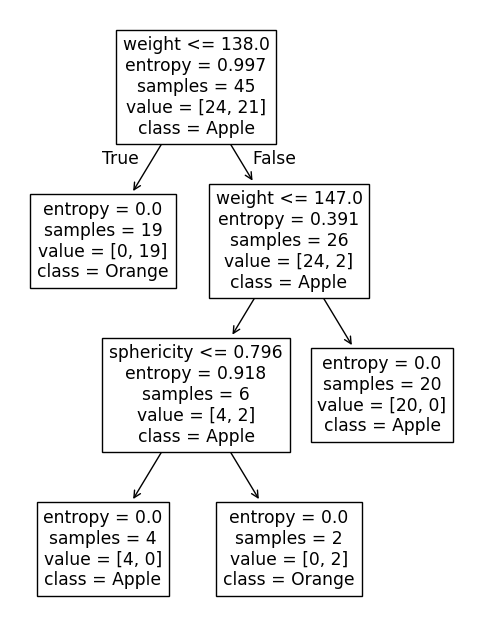

In [61]:
plt.figure(figsize=[6,8])

plot_tree(model, feature_names=X.columns, class_names=model.classes_)
plt.show()

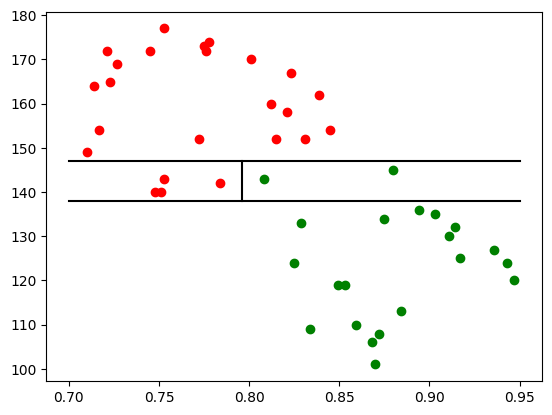

In [65]:
plt.scatter(x="sphericity", y="weight", data=X_train[y_train=='Apple'], c='red')
plt.scatter(x="sphericity", y="weight", data=X_train[y_train=='Orange'], c='green')
plt.plot([0.70, 0.95], [138, 138], c='black')
plt.plot([0.70, 0.95], [147.0, 147.0], c='black')
plt.plot([0.796, 0.796],[138, 147.0], c='black')

plt.show()

In [67]:
# with testind data:

y_predict = model.predict(X_test)
y_predict

array(['Apple', 'Orange', 'Apple', 'Orange', 'Apple', 'Orange', 'Apple',
       'Orange', 'Orange', 'Orange', 'Apple', 'Apple', 'Orange', 'Apple',
       'Orange'], dtype=object)

In [68]:
y_test.values

array(['Apple', 'Orange', 'Apple', 'Orange', 'Orange', 'Orange', 'Apple',
       'Orange', 'Orange', 'Orange', 'Apple', 'Apple', 'Orange', 'Apple',
       'Orange'], dtype=object)

In [69]:
y_predict == y_test.values

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [70]:
np.sum(y_predict==y_test)/len(y_test)

np.float64(0.9333333333333333)